# Exploratory Data Analysis on 2020 CDC Heart Disease Data

Before diving into the machine learning part on this dataset, we first do some exploratory data analysis to gain some understanding of the data. 

Originally, the dataset comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents.The most recent dataset (as of February 15, 2022) includes data from 2020. The vast majority of columns are key indicators of heart disease, such as obesity (high BMI), diabetic status, drinking too much alcohol, etc.


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/INDE_577_Repo/main/heart_2020.csv")
df.head() #shows the first 5 rows of the dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
df.shape #size of the dataset

(319795, 18)

In [18]:
missing_cnt = df.isnull().sum()
print(missing_cnt)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


There is no missing value.

## Visualization

Though there are so many options of things to graph, this dataset specially examines heart disease status, so we start by graphing counts for those who have heart disease those who not have.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

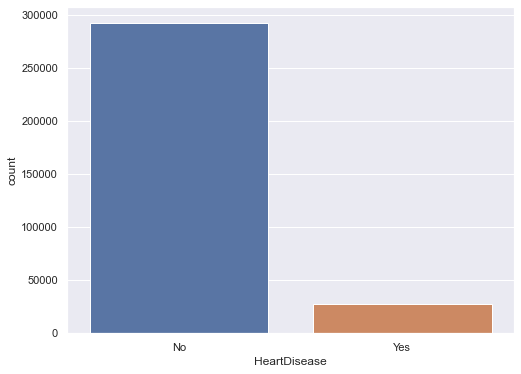

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x = "HeartDisease", data = df)

In [27]:
cnt_have_disease = len(df[df['HeartDisease']=='Yes'])
print(f'Percentage of people having heart disease: {round(cnt_have_disease/len(df),2)}')

Percentage of people having heart disease: 0.09


The ratio of people who have heart disease to those who do not have is about 1:10. Therefore, the dataset is imbalanced.

Text(0.5, 1.0, 'Distribution of BMI by Heart Disease Status')

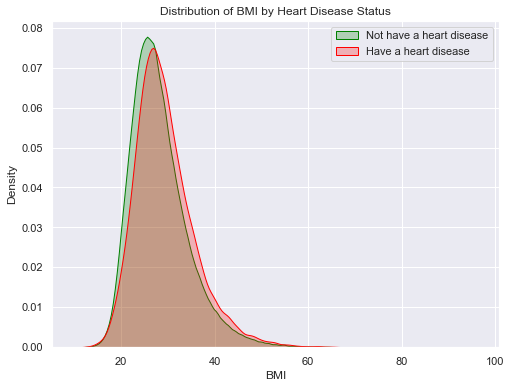

In [33]:
#Distribution of BMI
plt.figure(figsize=(8,6))
ax = sns.kdeplot(df.BMI[df["HeartDisease"] == 'No'],
                color="Green", shade = True)
ax = sns.kdeplot(df.BMI[df["HeartDisease"] == 'Yes'],
                ax =ax, color="Red", shade= True)
ax.legend(["Not have a heart disease","Have a heart disease"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('BMI')
ax.set_title("Distribution of BMI by Heart Disease Status")

We can see that the distributions of BMI for people having heart disease and not having heart disease are almost superposition. Both distributions are right-skewed. The mean of BMI for those not having heart disease is less than the mean of having heart disease.